In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [8]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(int)

X = X / 255.0

np.random.seed(0)
subset_indices = np.random.choice(len(X), size=int(len(X) * 0.1), replace=False)
X, y = X[subset_indices], y[subset_indices]
total_samples = len(X)

In [5]:
k_values = range(1, 11)
mean_accuracies = {k: [] for k in k_values}

In [6]:
def looCV(k, X, y, point):
    knn = KNeighborsClassifier(n_neighbors=k)
    X_test, y_test = X[point], y[point]
    X_train, y_train = np.delete(X, point, axis=0), np.delete(y, point)
    knn.fit(X_train, y_train)
    return knn.predict([X_test])[0] == y_test

In [9]:
for k in k_values:
    print(k)
    accuracy = []
    for i in range(total_samples):
        accuracy.append(looCV(k, X, y, i))
    mean_accuracies[k] = np.mean(accuracy)


1
2
3
4
5
6
7
8
9
10


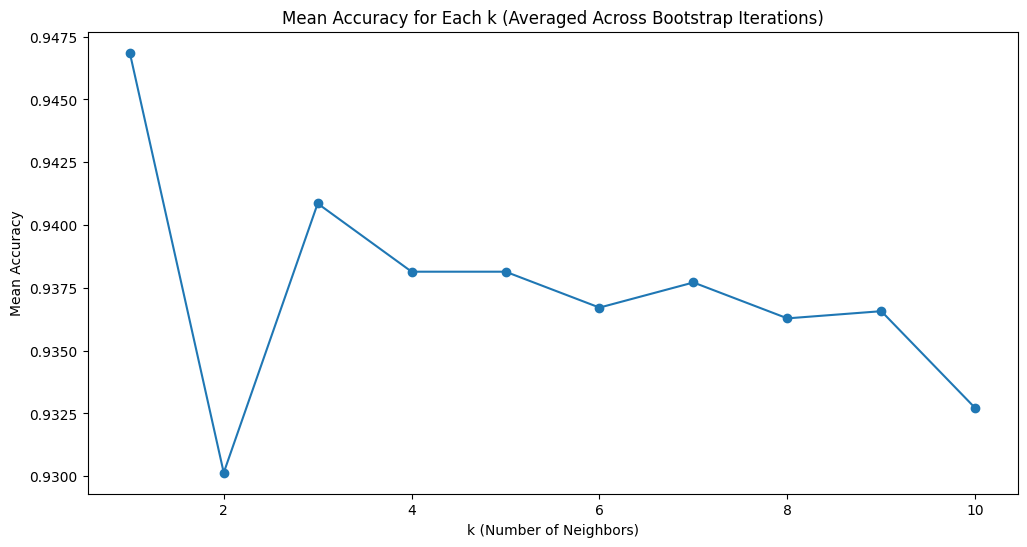

In [10]:
stabilization_accuracies = [np.mean(mean_accuracies[k]) for k in k_values]
plt.figure(figsize=(12, 6))
plt.plot(k_values, stabilization_accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy for Each k (Averaged Across Bootstrap Iterations)')
plt.show()